In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("si_env-2020.csv", sep=';', encoding='ISO-8859-1')
df.head()

,num_boletim,data_hora_boletim,Nº_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,pedestre,passageiro
0,2020-014152383-001,20/03/2020 02:18,1,S,1,NAO FATAL,M,NÃO,NÃO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N
1,2020-014152383-001,20/03/2020 02:18,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO ...,0,0,AUTOMOVEL,N,N
2,2020-014152383-001,20/03/2020 02:18,3,N,3,SEM FERIMENTOS,M,SIM,NÃO,32,20/11/1987,,...,0,0,AUTOMOVEL,N,S
3,2020-014158612-001,20/03/2020 05:39,1,N,1,NAO FATAL,F,SIM,NÃO,72,29/06/1947,,...,0,0,ONIBUS,N,S
4,2020-014158612-001,20/03/2020 05:39,2,S,3,SEM FERIMENTOS,M,SIM,NÃO,55,13/03/1965,N,NAO INFORMADO ...,0,0,ONIBUS,N,N


## Renaming column names into English from Portuguese

In [4]:
english_column_names = [
    'Accident_Record_Number',
    'Date_and_Time_of_Registration',
    'Number_of_People_Involved',
    'Driver_Responsible_For_Accident',
    'Severity_Code',
    'Severity_Description',
    'Person_Sex',
    'Seatbelt_Used',
    'Driver_Under_Influence_of_Alcohol',
    'Age',
    'Birth_Date',
    'License_Category',
    'License_Description',
    'Death_Count',
    'Old_Severity_Code',
    'Vehicle_Type',
    'Pedestrian_Involved',
    'Passenger_Present'
]

column_name_mapping = dict(zip(list(df.columns.values), english_column_names))

df.rename(columns=column_name_mapping, inplace=True)

In [5]:
df.head()

,Accident_Record_Number,Date_and_Time_of_Registration,Number_of_People_Involved,Driver_Responsible_For_Accident,Severity_Code,Severity_Description,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Birth_Date,License_Category,License_Description,Death_Count,Old_Severity_Code,Vehicle_Type,Pedestrian_Involved,Passenger_Present
0,2020-014152383-001,20/03/2020 02:18,1,S,1,NAO FATAL,M,NÃO,NÃO,35,06/09/1984,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,BICICLETA,N,N
1,2020-014152383-001,20/03/2020 02:18,2,S,3,SEM FERIMENTOS,F,SIM,SIM,42,11/03/1978,N,NAO INFORMADO ...,0,0,AUTOMOVEL,N,N
2,2020-014152383-001,20/03/2020 02:18,3,N,3,SEM FERIMENTOS,M,SIM,NÃO,32,20/11/1987,,...,0,0,AUTOMOVEL,N,S
3,2020-014158612-001,20/03/2020 05:39,1,N,1,NAO FATAL,F,SIM,NÃO,72,29/06/1947,,...,0,0,ONIBUS,N,S
4,2020-014158612-001,20/03/2020 05:39,2,S,3,SEM FERIMENTOS,M,SIM,NÃO,55,13/03/1965,N,NAO INFORMADO ...,0,0,ONIBUS,N,N


## Dropping columns that are not useful

In [6]:
# Check numeric columns' statistics
df.describe()

,Number_of_People_Involved,Severity_Code,Age,Death_Count,Old_Severity_Code
count,22643.000000,22643.000000,22643.000000,22643.0,22643.0
mean,1.741465,1.801175,34.597624,0.0,0.0
std,0.918086,1.020479,15.906508,0.0,0.0
min,1.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,1.000000,24.000000,0.0,0.0
50%,2.000000,1.000000,33.000000,0.0,0.0
75%,2.000000,3.000000,44.000000,0.0,0.0
max,18.000000,3.000000,91.000000,0.0,0.0


In [7]:
# We believe Accident_Record_Number, Driver_Responsible_For_Accident, Birth_Date do not contribute to the model
# Death_Count and Old_Severity_Code have all values of zeros
# Severity_Description and License_Description are just the descriptions for Severity_Code and License_Category respectively
df.drop(['Accident_Record_Number', 'Driver_Responsible_For_Accident', 'Severity_Description', 'Birth_Date', 'License_Description', 'Death_Count', 'Old_Severity_Code'], axis=1, inplace=True)
df

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,License_Category,Vehicle_Type,Pedestrian_Involved,Passenger_Present
0,20/03/2020 02:18,1,1,M,NÃO,NÃO,35,B,BICICLETA,N,N
1,20/03/2020 02:18,2,3,F,SIM,SIM,42,N,AUTOMOVEL,N,N
2,20/03/2020 02:18,3,3,M,SIM,NÃO,32,,AUTOMOVEL,N,S
3,20/03/2020 05:39,1,1,F,SIM,NÃO,72,,ONIBUS,N,S
4,20/03/2020 05:39,2,3,M,SIM,NÃO,55,N,ONIBUS,N,N
...,...,...,...,...,...,...,...,...,...,...,...
22638,14/12/2020 10:15,1,3,M,SIM,NÃO,34,B,AUTOMOVEL,N,N
22639,14/12/2020 10:15,2,1,M,SIM,NÃO,23,A,MOTOCICLETA,NaN,NaN
22640,14/12/2020 10:15,3,3,M,SIM,NÃO,36,E,ONIBUS,N,N
22641,13/12/2020 16:20,1,3,M,SIM,NÃO,24,B,AUTOMOVEL,N,N


In [8]:
# Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22643 entries, 0 to 22642
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Date_and_Time_of_Registration      22643 non-null  object
 1   Number_of_People_Involved          22643 non-null  int64 
 2   Severity_Code                      22643 non-null  int64 
 3   Person_Sex                         22643 non-null  object
 4   Seatbelt_Used                      22643 non-null  object
 5   Driver_Under_Influence_of_Alcohol  22643 non-null  object
 6   Age                                22643 non-null  int64 
 7   License_Category                   22643 non-null  object
 8   Vehicle_Type                       22643 non-null  object
 9   Pedestrian_Involved                20489 non-null  object
 10  Passenger_Present                  20598 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [9]:
# Remove leading & trailing whitespaces for columns that have data type of object/string
# Replace whatever empty string into null value
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df.replace('', np.nan, inplace=True)

## Check for null

In [10]:
print(df.isnull().sum())
print(df.shape)

Date_and_Time_of_Registration           0
Number_of_People_Involved               0
Severity_Code                           0
Person_Sex                              0
Seatbelt_Used                           0
Driver_Under_Influence_of_Alcohol       0
Age                                     0
License_Category                     3467
Vehicle_Type                         1207
Pedestrian_Involved                  2154
Passenger_Present                    2045
dtype: int64
(22643, 11)


In [11]:
print(f"Percentage of all null values: {(1 - df.dropna().shape[0]/df.shape[0]) * 100}%")

Percentage of all null values: 23.760102459921384%


In [12]:
print(f"Percentage of null values of Vehicle_Type, Pedestrian_Involved & Passenger_Present: {(1 - df.dropna(subset=['Vehicle_Type', 'Pedestrian_Involved', 'Pedestrian_Involved']).shape[0]/df.shape[0]) * 100}%")

Percentage of null values of Vehicle_Type, Pedestrian_Involved & Passenger_Present: 14.821357593958396%


In [13]:
df['Vehicle_Type'].unique()

array(['BICICLETA', 'AUTOMOVEL', 'ONIBUS', 'MOTOCICLETA', 'CAMIONETA',
       'CAMINHONETE', 'NAO INFORMADO', 'CAMINHAO', nan, 'CAMINHAO-TRATOR',
       'MICROONIBUS', 'MOTONETA', 'REBOQUE E SEMI-REBOQUE', 'PATINETE',
       'KOMBI', 'CICLOMOTOR', 'CARROCA', 'TRATOR MISTO', 'BONDE',
       'CARRO DE MAO', 'TRICICLO', 'TRATOR DE RODAS'], dtype=object)

In [14]:
# For Vehicle_Type that is NAO INFORMADO, change them to null value
df.loc[df['Vehicle_Type'] == 'NAO INFORMADO', 'Vehicle_Type'] = np.nan
print(df.isnull().sum())

Date_and_Time_of_Registration           0
Number_of_People_Involved               0
Severity_Code                           0
Person_Sex                              0
Seatbelt_Used                           0
Driver_Under_Influence_of_Alcohol       0
Age                                     0
License_Category                     3467
Vehicle_Type                         1264
Pedestrian_Involved                  2154
Passenger_Present                    2045
dtype: int64


In [15]:
# Drop column for License_Category
# Drop all null values
df.drop(['License_Category'], axis=1, inplace=True)
df.dropna(inplace=True)

In [16]:
print(df.isnull().sum())
print(df.shape)

Date_and_Time_of_Registration        0
Number_of_People_Involved            0
Severity_Code                        0
Person_Sex                           0
Seatbelt_Used                        0
Driver_Under_Influence_of_Alcohol    0
Age                                  0
Vehicle_Type                         0
Pedestrian_Involved                  0
Passenger_Present                    0
dtype: int64
(19241, 10)


## Check for duplicates

In [17]:
df.duplicated().any()

True

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().any()

False

In [20]:
df.shape

(19240, 10)

## Handling Age column's abnormal values
Based on Google, Brazil's minimum age for getting a driving license is 18 years old

In [21]:
df[df['Age'] < 18].count()

Date_and_Time_of_Registration        309
Number_of_People_Involved            309
Severity_Code                        309
Person_Sex                           309
Seatbelt_Used                        309
Driver_Under_Influence_of_Alcohol    309
Age                                  309
Vehicle_Type                         309
Pedestrian_Involved                  309
Passenger_Present                    309
dtype: int64

In [22]:
df.drop(df[df['Age'] < 18].index, inplace=True)
df.shape

(18931, 10)

## Data transformation

In [23]:
df.head()

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present
0,20/03/2020 02:18,1,1,M,NÃO,NÃO,35,BICICLETA,N,N
1,20/03/2020 02:18,2,3,F,SIM,SIM,42,AUTOMOVEL,N,N
2,20/03/2020 02:18,3,3,M,SIM,NÃO,32,AUTOMOVEL,N,S
3,20/03/2020 05:39,1,1,F,SIM,NÃO,72,ONIBUS,N,S
4,20/03/2020 05:39,2,3,M,SIM,NÃO,55,ONIBUS,N,N


In [24]:
# Extract hour part
df['Hour_of_Registration'] = df['Date_and_Time_of_Registration'].str[11:13]
df.head()

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
0,20/03/2020 02:18,1,1,M,NÃO,NÃO,35,BICICLETA,N,N,02
1,20/03/2020 02:18,2,3,F,SIM,SIM,42,AUTOMOVEL,N,N,02
2,20/03/2020 02:18,3,3,M,SIM,NÃO,32,AUTOMOVEL,N,S,02
3,20/03/2020 05:39,1,1,F,SIM,NÃO,72,ONIBUS,N,S,05
4,20/03/2020 05:39,2,3,M,SIM,NÃO,55,ONIBUS,N,N,05


#### Severity_Code column

In [25]:
severity_code_counts = df['Severity_Code'].value_counts().reset_index()
severity_code_counts.columns = ['Severity Code', 'Frequency']
print(severity_code_counts)

   Severity Code  Frequency
0              1      10083
1              3       8740
2              2         62
3              0         46


In [26]:
# For Severity_Code column, combine values of 0 and 1 into 0 (less severe), 2 and 3 into 1 (more severe)
df['Severity_Code'] = df['Severity_Code'].replace({1: 0, 2: 1, 3: 1})
df.head()

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
0,20/03/2020 02:18,1,0,M,NÃO,NÃO,35,BICICLETA,N,N,02
1,20/03/2020 02:18,2,1,F,SIM,SIM,42,AUTOMOVEL,N,N,02
2,20/03/2020 02:18,3,1,M,SIM,NÃO,32,AUTOMOVEL,N,S,02
3,20/03/2020 05:39,1,0,F,SIM,NÃO,72,ONIBUS,N,S,05
4,20/03/2020 05:39,2,1,M,SIM,NÃO,55,ONIBUS,N,N,05


#### Person_Sex column

In [27]:
df['Person_Sex'].unique()

array(['M', 'F', '0'], dtype=object)

In [28]:
# Person_Sex column only has 4 rows with unknown sex
df[df['Person_Sex'] == '0'].count()

Date_and_Time_of_Registration        4
Number_of_People_Involved            4
Severity_Code                        4
Person_Sex                           4
Seatbelt_Used                        4
Driver_Under_Influence_of_Alcohol    4
Age                                  4
Vehicle_Type                         4
Pedestrian_Involved                  4
Passenger_Present                    4
Hour_of_Registration                 4
dtype: int64

In [29]:
# Drop those unknown sex rows
df = df[df['Person_Sex'] != '0']
df[df['Person_Sex'] == '0'].count()

Date_and_Time_of_Registration        0
Number_of_People_Involved            0
Severity_Code                        0
Person_Sex                           0
Seatbelt_Used                        0
Driver_Under_Influence_of_Alcohol    0
Age                                  0
Vehicle_Type                         0
Pedestrian_Involved                  0
Passenger_Present                    0
Hour_of_Registration                 0
dtype: int64

In [30]:
# Make Person_Sex column numerically represented
sex_mapping = {'M': 0, 'F': 1}
df['Person_Sex'] = df['Person_Sex'].replace(sex_mapping)
df.head()

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
0,20/03/2020 02:18,1,0,0,NÃO,NÃO,35,BICICLETA,N,N,02
1,20/03/2020 02:18,2,1,1,SIM,SIM,42,AUTOMOVEL,N,N,02
2,20/03/2020 02:18,3,1,0,SIM,NÃO,32,AUTOMOVEL,N,S,02
3,20/03/2020 05:39,1,0,1,SIM,NÃO,72,ONIBUS,N,S,05
4,20/03/2020 05:39,2,1,0,SIM,NÃO,55,ONIBUS,N,N,05


#### Seatbelt_Used column

In [31]:
df['Seatbelt_Used'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [32]:
# Make Seatbelt_Used column numerically represented
seatbelt_mapping = {'NÃO': 0, 'SIM': 1}
df['Seatbelt_Used'] = df['Seatbelt_Used'].replace(seatbelt_mapping)
df.head()

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
0,20/03/2020 02:18,1,0,0,0,NÃO,35,BICICLETA,N,N,02
1,20/03/2020 02:18,2,1,1,1,SIM,42,AUTOMOVEL,N,N,02
2,20/03/2020 02:18,3,1,0,1,NÃO,32,AUTOMOVEL,N,S,02
3,20/03/2020 05:39,1,0,1,1,NÃO,72,ONIBUS,N,S,05
4,20/03/2020 05:39,2,1,0,1,NÃO,55,ONIBUS,N,N,05


#### Driver_Under_Influence_of_Alcohol column

In [33]:
df['Driver_Under_Influence_of_Alcohol'].unique()

array(['NÃO', 'SIM', 'NÃO INFORMADO'], dtype=object)

In [34]:
df[df['Driver_Under_Influence_of_Alcohol'] == 'NÃO INFORMADO'].shape

(13, 11)

In [35]:
df.drop(df[df['Driver_Under_Influence_of_Alcohol'] == 'NÃO INFORMADO'].index, inplace=True)
df['Driver_Under_Influence_of_Alcohol'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [36]:
alcohol_mapping = {'NÃO': 0, 'SIM': 1}
df['Driver_Under_Influence_of_Alcohol'] = df['Driver_Under_Influence_of_Alcohol'].replace(alcohol_mapping)
df.head()

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
0,20/03/2020 02:18,1,0,0,0,0,35,BICICLETA,N,N,02
1,20/03/2020 02:18,2,1,1,1,1,42,AUTOMOVEL,N,N,02
2,20/03/2020 02:18,3,1,0,1,0,32,AUTOMOVEL,N,S,02
3,20/03/2020 05:39,1,0,1,1,0,72,ONIBUS,N,S,05
4,20/03/2020 05:39,2,1,0,1,0,55,ONIBUS,N,N,05


#### Age column

In [37]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Age' column
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
0,20/03/2020 02:18,1,0,0,0,0,0.232877,BICICLETA,N,N,02
1,20/03/2020 02:18,2,1,1,1,1,0.328767,AUTOMOVEL,N,N,02
2,20/03/2020 02:18,3,1,0,1,0,0.191781,AUTOMOVEL,N,S,02
3,20/03/2020 05:39,1,0,1,1,0,0.739726,ONIBUS,N,S,05
4,20/03/2020 05:39,2,1,0,1,0,0.506849,ONIBUS,N,N,05


#### Vehicle_Type column

In [38]:
df['Vehicle_Type'].unique()

array(['BICICLETA', 'AUTOMOVEL', 'ONIBUS', 'MOTOCICLETA', 'CAMIONETA',
       'CAMINHONETE', 'CAMINHAO', 'CAMINHAO-TRATOR', 'MICROONIBUS',
       'MOTONETA', 'REBOQUE E SEMI-REBOQUE', 'CICLOMOTOR', 'KOMBI',
       'CARROCA', 'TRATOR MISTO', 'CARRO DE MAO', 'TRATOR DE RODAS',
       'TRICICLO', 'BONDE'], dtype=object)

In [39]:
# Create a mapping dictionary from vehicle types to numeric values
mapping = {vehicle: idx for idx, vehicle in enumerate(df['Vehicle_Type'].unique())}

# Map the 'Vehicle_Type' column to numeric values
df['Vehicle_Type'] = df['Vehicle_Type'].map(mapping)
df.head()

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
0,20/03/2020 02:18,1,0,0,0,0,0.232877,0,N,N,02
1,20/03/2020 02:18,2,1,1,1,1,0.328767,1,N,N,02
2,20/03/2020 02:18,3,1,0,1,0,0.191781,1,N,S,02
3,20/03/2020 05:39,1,0,1,1,0,0.739726,2,N,S,05
4,20/03/2020 05:39,2,1,0,1,0,0.506849,2,N,N,05


#### Pedestrian_Involved & Passenger_Present column

In [40]:
print(df['Pedestrian_Involved'].unique())
print(df['Passenger_Present'].unique())

['N' 'S']
['N' 'S']


In [41]:
yes_no_mapping = {'N': 0, 'S': 1}
df['Pedestrian_Involved'] = df['Pedestrian_Involved'].replace(yes_no_mapping)
df['Passenger_Present'] = df['Passenger_Present'].replace(yes_no_mapping)
df.head()

,Date_and_Time_of_Registration,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
0,20/03/2020 02:18,1,0,0,0,0,0.232877,0,0,0,02
1,20/03/2020 02:18,2,1,1,1,1,0.328767,1,0,0,02
2,20/03/2020 02:18,3,1,0,1,0,0.191781,1,0,1,02
3,20/03/2020 05:39,1,0,1,1,0,0.739726,2,0,1,05
4,20/03/2020 05:39,2,1,0,1,0,0.506849,2,0,0,05


#### Drop Date_and_Time_of_Registration column

In [42]:
df.drop(['Date_and_Time_of_Registration'], axis=1, inplace=True)
df.head()

,Number_of_People_Involved,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Age,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
0,1,0,0,0,0,0.232877,0,0,0,02
1,2,1,1,1,1,0.328767,1,0,0,02
2,3,1,0,1,0,0.191781,1,0,1,02
3,1,0,1,1,0,0.739726,2,0,1,05
4,2,1,0,1,0,0.506849,2,0,0,05


## Check data types

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18914 entries, 0 to 22641
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number_of_People_Involved          18914 non-null  int64  
 1   Severity_Code                      18914 non-null  int64  
 2   Person_Sex                         18914 non-null  int64  
 3   Seatbelt_Used                      18914 non-null  int64  
 4   Driver_Under_Influence_of_Alcohol  18914 non-null  int64  
 5   Age                                18914 non-null  float64
 6   Vehicle_Type                       18914 non-null  int64  
 7   Pedestrian_Involved                18914 non-null  int64  
 8   Passenger_Present                  18914 non-null  int64  
 9   Hour_of_Registration               18914 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 1.6+ MB


## Changing data type of Hour_of_Registration column to int

In [44]:
df['Hour_of_Registration'] = df['Hour_of_Registration'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18914 entries, 0 to 22641
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number_of_People_Involved          18914 non-null  int64  
 1   Severity_Code                      18914 non-null  int64  
 2   Person_Sex                         18914 non-null  int64  
 3   Seatbelt_Used                      18914 non-null  int64  
 4   Driver_Under_Influence_of_Alcohol  18914 non-null  int64  
 5   Age                                18914 non-null  float64
 6   Vehicle_Type                       18914 non-null  int64  
 7   Pedestrian_Involved                18914 non-null  int64  
 8   Passenger_Present                  18914 non-null  int64  
 9   Hour_of_Registration               18914 non-null  int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 1.5 MB


## Chi-Square Heatmap for each feature (nominal) vs label

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [47]:
df2 = df.drop(['Number_of_People_Involved', 'Age'], axis=1)

# Create a resultant DataFrame
resultant = pd.DataFrame(data=np.zeros((len(df2.columns), len(df2.columns))),
                         columns=list(df2.columns),
                         index=list(df2.columns))

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df2.columns):
    for j in list(df2.columns):
        if i != j:
            contingency_table = pd.crosstab(df2[i], df2[j])
            chi2_val, p_val, _, _ = scipy.stats.chi2_contingency(contingency_table)
            resultant.loc[i, j] = p_val

resultant

,Severity_Code,Person_Sex,Seatbelt_Used,Driver_Under_Influence_of_Alcohol,Vehicle_Type,Pedestrian_Involved,Passenger_Present,Hour_of_Registration
Severity_Code,0.000000e+00,4.155465e-04,2.486156e-45,5.094905e-01,0.000000e+00,1.000000,9.620708e-212,5.890660e-15
Person_Sex,4.155465e-04,0.000000e+00,1.112838e-04,1.321082e-04,1.062169e-142,0.460576,0.000000e+00,7.814729e-06
Seatbelt_Used,2.486156e-45,1.112838e-04,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.652586e-01,2.850248e-01
Driver_Under_Influence_of_Alcohol,5.094905e-01,1.321082e-04,1.000000e+00,0.000000e+00,1.971790e-17,1.000000,6.270075e-01,1.011040e-89
Vehicle_Type,0.000000e+00,1.062169e-142,0.000000e+00,1.971790e-17,0.000000e+00,1.000000,6.860945e-55,9.034344e-18
Pedestrian_Involved,1.000000e+00,4.605756e-01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.000000e+00,8.160098e-01
Passenger_Present,9.620708e-212,0.000000e+00,1.652586e-01,6.270075e-01,6.860945e-55,1.000000,0.000000e+00,2.908666e-25
Hour_of_Registration,5.890660e-15,7.814729e-06,2.850248e-01,1.011040e-89,9.034344e-18,0.816010,2.908666e-25,0.000000e+00


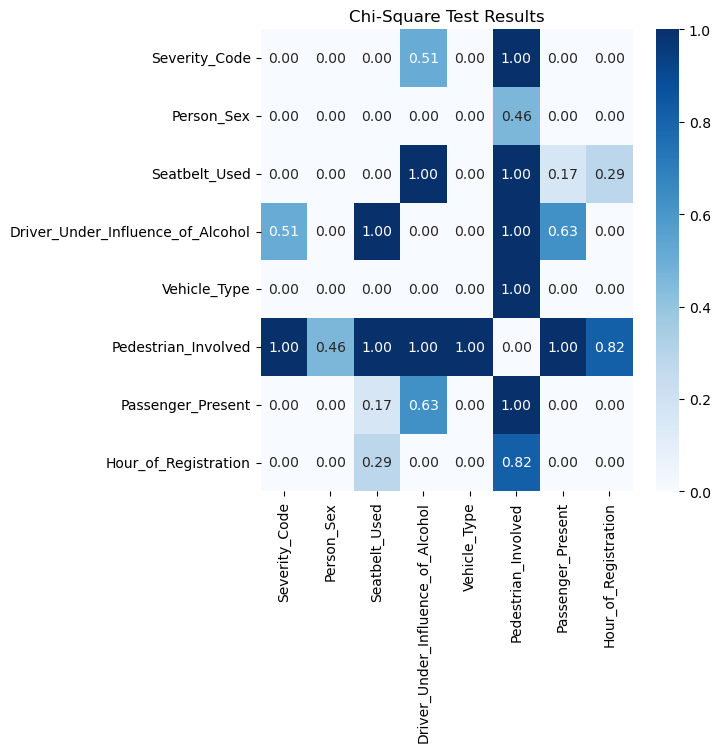

In [48]:
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(resultant, annot=True, cmap='Blues', fmt=".2f")
plt.title('Chi-Square Test Results')
plt.show()

## Drop Driver_Under_Influence_of_Alcohol and Pedestrian_Involved columns, as they are do not have significance relationship to the label, Severity_Code

In [49]:
df.drop(['Pedestrian_Involved', 'Driver_Under_Influence_of_Alcohol'], axis=1, inplace=True)

## Correlation Heatmap for each feature vs feature (numerical)

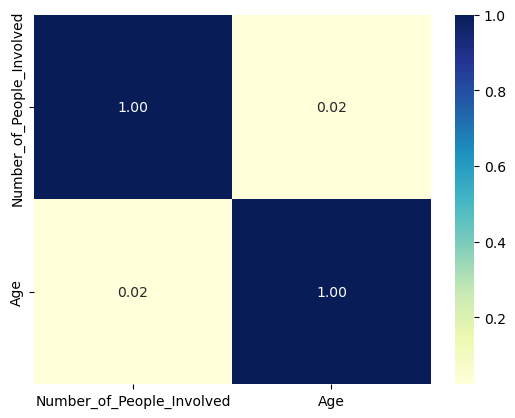

In [50]:
# plotting correlation heatmap
sns.heatmap(df[['Number_of_People_Involved', 'Age']].corr(), cmap="YlGnBu", annot=True, fmt=".2f")
  
# displaying heatmap
plt.show()

## Export preprocessed csv file

In [51]:
df.to_csv("preprocessed_car_accident_dataset.csv", index=False)